Hai semuanya, pada kesempatan ini kalian akan mengerjakan tugas akhir berupa praktikum analisis data menggunakan PySpark.

Semangat Belajar dan Jangan menyerah :)

Silahkan download data berikut
https://drive.google.com/drive/folders/1NhEG9zRplX6QXnwhk9-QJxV1hmzpknGD?usp=sharing

dan masukan ke dalam google drive anda 

**1. Silahkan install PySpark**

In [2]:
!pip install pyspark py4j

     |████████████████████████████████| 281.4 MB 33 kB/s 
     |████████████████████████████████| 199 kB 43.2 MB/s 
     |████████████████████████████████| 198 kB 58.3 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=a95f7fca10fc8362d63e3c24a1cc1192c61025a3e394ba05ca0266978594df26
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


**2. Silahkan Mengcreate Spark Session**

In [3]:
from pyspark.sql import SparkSession

In [4]:
spark = SparkSession.builder.appName("test_pyspark").getOrCreate()

In [5]:
spark

**3. Masukan data yang telah di download pada google drive**

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
df = spark.read.csv('/content/drive/MyDrive/Colab Notebooks/mall.csv', header=True, inferSchema=True)

**4. Buat Perintah yang dapat menampilkan tipe data pada setiap kolom**

In [9]:
df.printSchema()

root
 |-- CustomerID: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Annual Income (k$): integer (nullable = true)
 |-- Spending Score (1-100): integer (nullable = true)



**5. Buat perintah yang dapat menampilkan nama kolom, jumlah baris, dan jumlah kolom**

In [10]:
df.columns

['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [11]:
df.count()

200

In [12]:
len(df.columns)

5

**6. Buat perintah yang dapat menampilkan statistik data pada setiap kolom**

In [13]:
df.describe().show()

+-------+------------------+------+-----------------+------------------+----------------------+
|summary|        CustomerID|Gender|              Age|Annual Income (k$)|Spending Score (1-100)|
+-------+------------------+------+-----------------+------------------+----------------------+
|  count|               200|   200|              200|               200|                   200|
|   mean|             100.5|  null|            38.85|             60.56|                  50.2|
| stddev|57.879184513951124|  null|13.96900733155888| 26.26472116527124|    25.823521668370173|
|    min|                 1|Female|               18|                15|                     1|
|    max|               200|  Male|               70|               137|                    99|
+-------+------------------+------+-----------------+------------------+----------------------+



**7. Buat perintah yang dapat menampilkan 2 kolom**

In [14]:
df.select('CustomerID', 'Age').show()

+----------+---+
|CustomerID|Age|
+----------+---+
|         1| 19|
|         2| 21|
|         3| 20|
|         4| 23|
|         5| 31|
|         6| 22|
|         7| 35|
|         8| 23|
|         9| 64|
|        10| 30|
|        11| 67|
|        12| 35|
|        13| 58|
|        14| 24|
|        15| 37|
|        16| 22|
|        17| 35|
|        18| 20|
|        19| 52|
|        20| 35|
+----------+---+
only showing top 20 rows



**8. Buat perintah yang dapat membuat kolom baru dengan menambahkan value pada nilai tabel**

In [15]:
df.withColumn('Age_Baru',df.Age+1).show()

+----------+------+---+------------------+----------------------+--------+
|CustomerID|Gender|Age|Annual Income (k$)|Spending Score (1-100)|Age_Baru|
+----------+------+---+------------------+----------------------+--------+
|         1|  Male| 19|                15|                    39|      20|
|         2|  Male| 21|                15|                    81|      22|
|         3|Female| 20|                16|                     6|      21|
|         4|Female| 23|                16|                    77|      24|
|         5|Female| 31|                17|                    40|      32|
|         6|Female| 22|                17|                    76|      23|
|         7|Female| 35|                18|                     6|      36|
|         8|Female| 23|                18|                    94|      24|
|         9|  Male| 64|                19|                     3|      65|
|        10|Female| 30|                19|                    72|      31|
|        11|  Male| 67|  

**9. Buat perintah yang dapat melakukan perubahan pada nama kolom**

In [16]:
df.withColumnRenamed('Annual Income (k$)','Income').show()

+----------+------+---+------+----------------------+
|CustomerID|Gender|Age|Income|Spending Score (1-100)|
+----------+------+---+------+----------------------+
|         1|  Male| 19|    15|                    39|
|         2|  Male| 21|    15|                    81|
|         3|Female| 20|    16|                     6|
|         4|Female| 23|    16|                    77|
|         5|Female| 31|    17|                    40|
|         6|Female| 22|    17|                    76|
|         7|Female| 35|    18|                     6|
|         8|Female| 23|    18|                    94|
|         9|  Male| 64|    19|                     3|
|        10|Female| 30|    19|                    72|
|        11|  Male| 67|    19|                    14|
|        12|Female| 35|    19|                    99|
|        13|Female| 58|    20|                    15|
|        14|Female| 24|    20|                    77|
|        15|  Male| 37|    20|                    13|
|        16|  Male| 22|    2

**10. Buat Perintah yang dapat melakukan filter data pada salah satu kolom**

In [20]:
df.filter(df['Age']>68).show()

+----------+------+---+------------------+----------------------+
|CustomerID|Gender|Age|Annual Income (k$)|Spending Score (1-100)|
+----------+------+---+------------------+----------------------+
|        58|  Male| 69|                44|                    46|
|        61|  Male| 70|                46|                    56|
|        71|  Male| 70|                49|                    55|
+----------+------+---+------------------+----------------------+



**11. Silahkan lakukan penampahan nilai data jika terdapat data kosong pada dataframe**

In [21]:
df.show()

+----------+------+---+------------------+----------------------+
|CustomerID|Gender|Age|Annual Income (k$)|Spending Score (1-100)|
+----------+------+---+------------------+----------------------+
|         1|  Male| 19|                15|                    39|
|         2|  Male| 21|                15|                    81|
|         3|Female| 20|                16|                     6|
|         4|Female| 23|                16|                    77|
|         5|Female| 31|                17|                    40|
|         6|Female| 22|                17|                    76|
|         7|Female| 35|                18|                     6|
|         8|Female| 23|                18|                    94|
|         9|  Male| 64|                19|                     3|
|        10|Female| 30|                19|                    72|
|        11|  Male| 67|                19|                    14|
|        12|Female| 35|                19|                    99|
|        1

In [22]:
from pyspark.sql.functions import mean

In [23]:
mean1 = df.select(mean(df['Age'])).collect()

In [24]:
mean1[0][0]

38.85

In [25]:
df.fillna(mean1[0][0]).show()

+----------+------+---+------------------+----------------------+
|CustomerID|Gender|Age|Annual Income (k$)|Spending Score (1-100)|
+----------+------+---+------------------+----------------------+
|         1|  Male| 19|                15|                    39|
|         2|  Male| 21|                15|                    81|
|         3|Female| 20|                16|                     6|
|         4|Female| 23|                16|                    77|
|         5|Female| 31|                17|                    40|
|         6|Female| 22|                17|                    76|
|         7|Female| 35|                18|                     6|
|         8|Female| 23|                18|                    94|
|         9|  Male| 64|                19|                     3|
|        10|Female| 30|                19|                    72|
|        11|  Male| 67|                19|                    14|
|        12|Female| 35|                19|                    99|
|        1

**12. Silahkan lakukan visualisasi data untuk salah satu kolom**

In [26]:
pip install plotly --upgrade

     |████████████████████████████████| 15.2 MB 14.7 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


In [27]:
import plotly as py
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

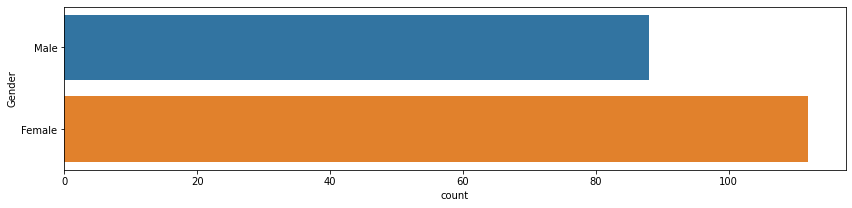

In [31]:
plt.figure(1, figsize = (14, 3))
sns.countplot(y = 'Gender', data=df.toPandas())
plt.show()